In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.7+ KB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


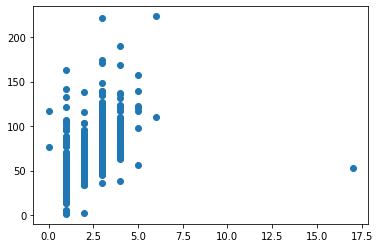

In [5]:
plt.scatter(test_data.Rooms, test_data.Square)

In [3]:
from scipy.cluster.vq import kmeans

In [6]:
# Конвертируем зарплату в массив numpy
trd_rooms = train_data['Rooms'].values
te_rooms = test_data['Rooms'].values
 
# Для совместимости со SciPy 
trd_rooms = trd_rooms.reshape(-1, 1)
trd_rooms = trd_rooms.astype('float64')
te_rooms = te_rooms.reshape(-1, 1)
te_rooms = te_rooms.astype('float64')

# Импортируем kmeans из SciPy
from scipy.cluster.vq import kmeans
from scipy import cluster
    
# Передаём данные и число кластеров в kmeans()
centroids, avg_distance = kmeans(trd_rooms, 4)
centroids, avg_distance = kmeans(te_rooms, 4)


ValueError: x and y must be the same size

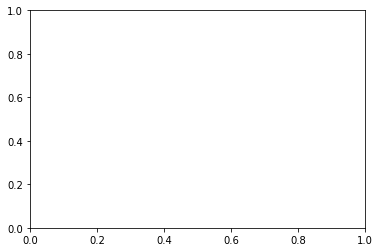

In [7]:
# Получаем кластеры и расстояния
groups, cdist = cluster.vq.vq(trd_rooms, centroids)
groups, cdist = cluster.vq.vq(te_rooms, centroids)
 
# Рисуем график
plt.scatter(trd_rooms, np.arange(0,100), c=groups)
plt.xlabel('Rooms')
plt.ylabel('Indices')
plt.show()

In [ ]:
# Рисуем график
plt.scatter(te_rooms, np.arange(0,100), c=groups)
plt.xlabel('Rooms')
plt.ylabel('Indices')
plt.show()

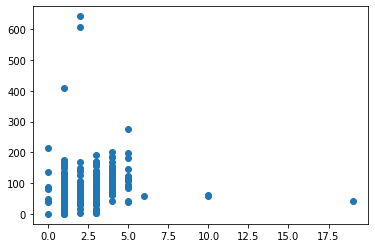

In [6]:
plt.scatter(train_data.Rooms, train_data.Square)

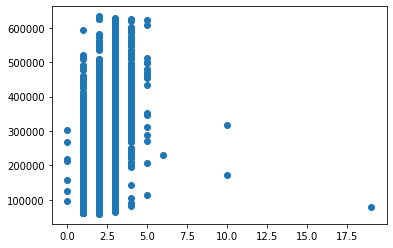

In [7]:
plt.scatter(train_data.Rooms, train_data.Price)

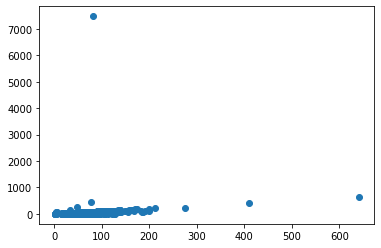

In [8]:
plt.scatter(train_data.Square, train_data.LifeSquare)

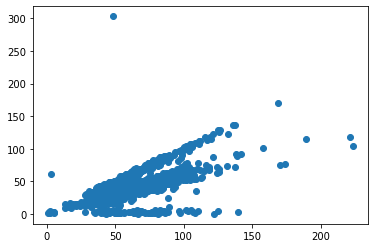

In [9]:
plt.scatter(test_data.Square, test_data.LifeSquare)

In [10]:
# Функции для очистки и подготовки данных
mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2020, 'HouseYear'].mean())
mean_healthcare = np.round(train_data["Healthcare_1"].mean())
mean_square_for_max = train_data.loc[(train_data['Rooms'] <= train_data.loc[(train_data['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
mean_square_for_big_ls = train_data.loc[train_data['LifeSquare'] > 250, 'Square'].mean()
mean_life_squae_for_max = train_data.loc[train_data['Square'] >= mean_square_for_big_ls, 'LifeSquare'].mean()

In [11]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [12]:
def clean_life_square(df, koef_S_LS):
    df.loc[(df['LifeSquare'] < 15) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85
    df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = mean_life_squae_for_max

In [13]:
def clean_square(df, mean_square_for_max):
    df.loc[(df['Square'] > 300), 'Square'] = mean_square_for_max

In [14]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [15]:
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [16]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare, mean_square_for_max=mean_square_for_max, mean_life_squae_for_max=mean_life_squae_for_max):
    clean_year(df, mean_year)
    clean_life_square(df, mean_life_squae_for_max)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)
    clean_square(df, mean_square_for_max)

In [17]:
prepare_data(train_data)
prepare_data(test_data)

In [18]:
def Maxstd(df, alpha=0.97):
    X = df
    Zero = pd.DataFrame(0, index=X.index, columns=X.columns)
    numbers = np.empty([0])
    ResArray = X.copy()
    OperatingArray = X.copy()

    while True:
        m = OperatingArray.mean()
        s = OperatingArray.std()
        XX = (OperatingArray - m) / s
        L = paired_distances(XX, Zero)
        maxindex = np.argmax(L)
        XX.ix[maxindex] = np.nan
        ss = XX.std()
        if ss.min() >= alpha:
            break;
        numbers = np.append(numbers, maxindex)
        OperatingArray.ix[maxindex] = m

    ResArray.ix[numbers] = np.nan
    Result = pd.DataFrame(columns=X.columns)
    Result = Result.append(X.mean(), ignore_index=True)
    Result = Result.append(ResArray.mean(), ignore_index=True)
    Result = Result.append(X.std(), ignore_index=True)
    Result = Result.append(ResArray.std(), ignore_index=True)
    Result = Result.append(X.min(), ignore_index=True)
    Result = Result.append(ResArray.min(), ignore_index=True)
    Result = Result.append(X.max(), ignore_index=True)
    Result = Result.append(ResArray.max(), ignore_index=True)

    Result.index = ['Mean (before)', 'Mean (after)', 'Standard deviation (before)', 'Standard deviation (after)', 'Minimum (before)',
        'Minimum(after)', 'Maximum (before)', 'Maximum(after)']
    return ResArray, Result, numbers

In [22]:
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
y = train_data.Price

In [25]:
Xt = pd.get_dummies(test_data)
Xt.drop("Id", axis=1, inplace=True)
yt = train_data.Price

In [26]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null float64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(8), int64(7), uint8(6)
memory usage: 615.3 KB


In [28]:
# метод основан на вычислении среднего значения и стандартного отклонения
from sklearn.metrics.pairwise import paired_distances
Maxstd(X)
Maxstd(Xt)

C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
.ix is deprecated. Ple

(      DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
 0           58.0    2.0  49.882643   33.432782            6.0    6.0   
 1           74.0    2.0  69.263183   58.873706            1.0    6.0   
 2          190.0    1.0  13.597819   15.948246           12.0    2.0   
 3           47.0    2.0  73.046609   51.940842            9.0   22.0   
 4           27.0    1.0  47.527111   43.387569            1.0   17.0   
 ...          ...    ...        ...         ...            ...    ...   
 4995        11.0    3.0  67.133911   50.809797            6.0    5.0   
 4996         1.0    1.0  40.198472   21.807061           10.0   12.0   
 4997        12.0    3.0  77.842178   48.282625            9.0   23.0   
 4998        62.0    2.0  81.305222   69.109439            0.0    4.0   
 4999        30.0    2.0  60.555693   51.472339            1.0   10.0   
 
       HouseFloor  HouseYear  Ecology_1  Social_1  ...  Social_3  Healthcare_1  \
 0           14.0     1972.0   0.310199 

In [ ]:
# удалить отобранные строки
df = df.drop(df[df.score < 50].index)
df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1

In [ ]:
# обработать отобранные строки


In [ ]:
df_num_features = train_data.select_dtypes(include=['float64','uint8'])  # отбираем количественные признаки
import seaborn as sns
sns.pairplot(df_num_features);

# RandomForestRegressor

In [46]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
prepare_data(train_data)
prepare_data(test_data)
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
y = train_data.Price

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.13, random_state=42)

model = RandomForestRegressor(n_estimators=500, max_depth=17, random_state=42, max_features=8, 
                              n_jobs=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(r2_score(y_train, y_pred_train))
r2_score(y_valid, y_pred)

In [31]:
# Предсказываем цены для тестовых данных и выгружаем в файл
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)

In [32]:
# экспорт в файл
test_data.loc[:, ['Id', 'Price']].to_csv('best_01.csv', index=False)

GradientBoostingRegressor

In [50]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
prepare_data(train_data)
prepare_data(test_data)
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
y = train_data.Price

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.16, random_state=42)
# переобучение и оценка модели
from sklearn.ensemble import GradientBoostingRegressor
final_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42,
                                        min_samples_leaf=4
                                       )
# min_samples_split=5, subsample=0.5  

final_model.fit(X_train, y_train)

y_pred_gbr = final_model.predict(X_valid)
y_pred_train_gbr = final_model.predict(X_train)

r2_score(y_valid, y_pred_gbr)

0.7608863988247949

In [48]:
# Предсказываем цены для тестовых данных и выгружаем в файл
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = final_model.predict(X_test)

In [49]:
# экспорт в файл
test_data.loc[:, ['Id', 'Price']].to_csv('best_gbr_01.csv', index=False)

In [71]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
import seaborn as sns
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 9)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 9)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 9)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [76]:
# y_train_preds = final_model.predict(X_train)
# evaluate_preds(y_train, y_train_preds)

нейросеть

In [77]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

ModuleNotFoundError: No module named 'keras'

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

In [ ]:
data = np.concatenate((training_data, testing_data), axis=0)

In [ ]:
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [ ]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [ ]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
print("Test-Accuracy:", np.mean(results.history["val_acc"]))